# 备忘录
1. 激活函数
2. 常用层
3. kernel
4. 过拟合与欠拟合常用方法
5. 层参数
6. 训练技巧
7. 经典网络结构

## 关于交叉熵与最大释然估计

对于一个简单的分类问题 可以用线性回归或者是逻辑回归进行解决，其中就可以推到出最大释然估计，而交叉熵是在对于从信息学角度，从熵出推导得出，首先定义一个二元线性回归模型：$\hat{y} = \theta_1 x_1 + \theta_2 x_2 + bias$,  其中$\hat{y}$的取值范围在$[-\infty,+\infty ]$。$\hat{y}表示的预测值$

__** $probability$和$odds$的定义**__   
1. $probability$指的是**发生的次数**/**总次数**, 如果抛硬币:    
$$p = \frac{正面向上的次数}{总次数}$$  p的取值范围为$[0, 1]$
2. $odds$则是一种比率, 指的是**发生的次数**/**没有发生的次数**:   
$$odds = \frac{正面向上次数}{反面向上次数}$$  odds的取值范围为$[0, +\infty)$   
3. 回顾**伯努利分布**: 如果$X$是**伯努利分布**中的随机变量, $X$的取值为$\{0,1\}$, 非$0$即$1$, 如抛硬币的正反面:   
则:  $P(X=1)=p \quad P(X=0)=1-p$   
代入$odds$:  $$odds={{p}\over{1-p}} \quad odds\in[0, +\infty)$$
将线性回归模型来表示$logit(p)$如下

由$logit(p) = \theta_1 x_1 + \theta_2 x_2 + bias$得出$log(\frac{p}{1-p})=\theta_1 x_1 + \theta_2 x_2 + bias$,   
设$\theta_1 x_1 + \theta_2 x_2 + bias=z$, 得出:   
$log(\frac{p}{1-p})=z$, 等式两边取$e$:   
$$\frac{p}{1-p}=e^z$$
$$p=e^z(1-p)=e^z-e^zp$$
$$p(1+e^z)=e^z$$
$$p=\frac{e^z}{1+e^z}$$
分子分母同除$e^z$, 得出:
$$p=\frac{1}{1+e^{-z}} \quad p \in (0,1)$$
由上面推导, 我们得出了$sigmoid$函数, 终于可以把**线性回归模型**输出的的实数空间取值映射成为概率了.   
$$sigmoid(z)=\frac{1}{1+e^{-z}} \quad sigmoid(z) \in (0,1)$$
我们来画一下$sigmoid$函数, 注意$sigmoid(z)$的取值范围:

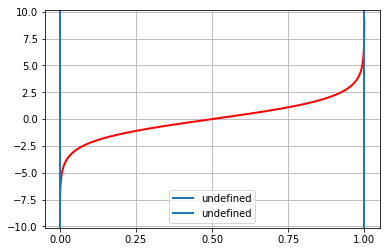

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def logit(p):
    return np.log(p/(1-p))
p = np.arange(1e-4, 1, 0.0001)
y = logit(p)
plt.plot(p, y , color='red', lw=2)
plt.axvline(x=0, lw=2, label="undefined")
plt.axvline(x=1, lw=2, label="undefined")
plt.xticks([i/100 for i in range(0, 125, 25)])
plt.grid()
plt.legend()
plt.show()

__**最大似然估计**__
1. 引入**假设函数**$h_{\theta}(X)$，设$\theta^TX$为**线性回归模型**:   
$\theta^TX$中, $\theta$和$X$均为**列向量**, 例如:
$\theta^T=
 \left[
 \begin{matrix}
   bias & \theta_1 & \theta_2 
  \end{matrix}
  \right]
\quad
X=
 \left[
 \begin{matrix}
   1  \\
   x_1  \\
   x_2 
  \end{matrix}
  \right]
$ 求矩阵点积, 得出:   
$$\theta^TX = bias * 1 + \theta_1 * x_1 + \theta_2 * x_2 = \theta_1x_1 + \theta_2x_2 + bias$$
设$\theta^TX = z$ 则有假设函数: 
$$h_\theta(X)=\frac{1}{1+e^{-z}}=P(Y=1 \mid X;\theta)$$
上式代表了$Y=1$的概率;   
$$P(Y=0 \mid X;\theta)=1-h_\theta(X)$$   
上式代表了$Y=0$的概率, 注意$Y \in \{0, 1\}$ 非$0$即$1$
2. 回顾**伯努利分布**(Bernoulli distribution):    
$$f(k;p)={\begin{cases}p&{\text{if }}k=1,\\q=1-p&{\text{if }}k=0.\end{cases}}$$
或$f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}$ 注意$f(k;p)$表示的是$k$为$0$或$1$的概率, 也就是$P(k)$
3. 定义**似然函数$(likelihood function)$**:
$${\begin{aligned}L(\theta \mid x)&=P(Y\mid X;\theta )\\&=\prod _{i}^{m}P(y_{i}\mid x_{i};\theta )\\&=\prod _{i}^{m}h_{\theta }(x_{i})^{y_{i}}(1-h_{\theta }(x_{i}))^{(1-y_{i})}\end{aligned}}$$
其中$i$为每个数据样本, 共有$m$个数据样本, **最大似然估计**的目的就是让上式的从输出值尽可能大;      
对上式取$log$, 以方便计算, 因为取$log$可以把乘积转换为加法，而且不影响我们的优化目标:
$$L(\theta \mid x) = \log(P({Y}\mid{h_{\theta }(X})) = \sum_{i=1}^{m} y_i \log(h_{\theta}({x}_i)) + (1-y_i) \log(1 - h_{\theta}({x}_i))$$
我们只要在式子前面加一个负号,即可把求最大转换为求最小, 设$h_{\theta}(X)=\hat{Y}$, 得出损失函数$J(\theta)$, 我们只要最小化这个函数, 就能通过求导来得出我们想要的$\theta$:   
$$J(\theta)=-\sum_{i}^{m}（Y log(\hat{Y}) - (1-Y) log(1-\hat{Y})）$$
交叉熵的定义如下：   
$$CrossEntropy(Y, \hat{Y})=- \frac{1}{m}\sum_{i}^{m} \sum_{c}^{N_c} Y \log (\hat{Y}) $$
其中$c$为分类编号, $N_c$为所有的分类数量。

** 交叉熵 **

提到交叉熵，首先从信息量和熵说起。
信息量通常的解释就是一件发生概率越小的事件发生所产生的信息越大，也即信息量的大小与事件发生概率成反比。
定义如下： 
    假设$X$是一个离散型随机变量，其取值集合为$ \chi $。概率分布函数$p(x)=Pr(X=x),x\in \chi$则定义事件$X=x_0$的信息量为：
                                        $$I(x_0)=-log(p(x_0))$$
    其中$p(x_0) \in[0,1]$ 下面画出信息量与事件发生概率的图像

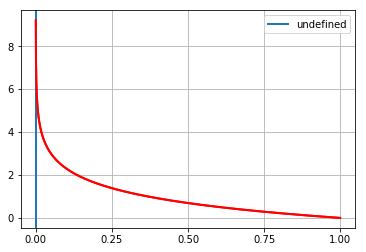

In [4]:
def logit(p):
    return np.log(p)
p = np.arange(1e-4, 1, 0.0001)
y = -logit(p)
plt.plot(p, y , color='red', lw=2)
# plt.axvline(x=0, lw=2, label="undefined")
# plt.axvline(y=0, lw=2, label="undefined")
plt.xticks([i/100 for i in range(0, 125, 25)])
plt.grid()
plt.legend()
plt.show()

前面已经对信息量进行了相关定义以及解释，而**熵的定义就是所有信息量的期望即**
$$H(X)=\sum^{n}_{i=1}p(x_i)I(x_i)=-\sum^{n}_{i=1}p(x_i)log(p(x_i))$$
对于一个事件只有两种结果的过程来说，也即二分类问题可以简化为
$$H(X)=-\sum^{n}_{i=1}p(x_i)log(p(x_i))=-p(x)log(p(x))-(1-p(x))log(1-(p(x))$$


**相对熵**
相对熵又称为KL散度，如果我们对于一个随机变量X有两个单独的概率分别P(X)和Q(X)，我们使用KL散度来衡量这两个概率之间的差异。
即如果用P来描述目标问题，而不是用Q来描述目标问题，得到的信息增量。
在机器学习中，P往往表示的是样本真实的分布，Q表示的模型预测的分布。其计算公式如下：
$$D_{KL}(p||q)=\sum_{i=1}^{n}p(x_i)log(\frac{p(x_i)}{q(x_i)}) \\
              =\sum_{i=1}^{n}p(x_i)log(p(x_i))-\sum_{i=1}^{n}p(x_i)log(q(x_i)) \\
              =-H(p(x))+(-\sum_{i=1}^{n}p(x_i)log(q(x_i)))
$$
等式前一部分是p的熵，等式后一部分就是交叉熵：
$$H(p,q)=-\sum_{i=1}^{n}p(x_i)log(q(x_i))$$

在线性回归问题中常用MSE作为loss函数，在分类问题熵使用交叉熵函数